# Blatt 1 

## Aufgabe 1a) und b) 

Es werden zwei Funktionen empirisch untersucht. Dabei soll festgestellt werden, für welche Bereiche von $x$ das numerische Ergebnis vom algebraischen um nicht mehr als 1% abweicht und in welchen Bereichen das Ergebnis gleich null ist. Anschließend gibt es eine graphische Auswertung. 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
def f(x):
    return (x**3 + 1/3) - (x**3 - 1/3)

In [5]:
def g(x):
    return ((3+(x**3)/3) - (3 - (x**3)/3))/x**3

In [6]:
def interval(a):
    if len(a) != 0:
        new = np.arange(0, len(a), 1)
        index1 = (a[new-1]+1 != a[new])
        index2= np.append(index1[1:], index1[0])
        a1= a[index1]
        a2= a[index2]
        for i in range(len(a1)):
            if (a1[i]==a2[i]):
                print("(", a1[i], ")","; ", sep="", end="")
            else:
                print("(", a1[i],",", a2[i], ")","; ", sep="", end="")
        print("")
    else: print("Leeres Array.")

In [7]:
def makeplot(func, fig, c):
    x= np.linspace(1, 10**c, 10**c)
    y= func(x)
    y0= 2/3* np.ones(len(x)) #"exakter Wert" 2/3
    x1= x[(y==2/3)] #numerische Werte mit keiner Abweichung
    x2= x[(y>((2/3)+0.01)) | (y<(2/3 - 0.01))] #numerische Abweichung unter einem Prozent
    x3= x[(y<((2/3)+0.01)) & (y>(2/3 - 0.01)) & (y!=2/3)] #numerische Abweichung über einem Prozent
    plt.figure(fig, figsize=(8,6))
    plt.xscale("log")
    plt.plot(x, y0, "b", label="Tatsächlicher Wert")
    plt.plot(x1, func(x1), "k.", label="Numerische Abweichung von 0")
    plt.plot(x2, func(x2), "g.", label="Abweichung größer als 1%", linestyle="None")
    plt.plot(x3, func(x3), "r.", label="Abweichung weniger als 1%", linestyle="None")
    plt.legend()
    print("Tatsächlicher Wert für Formel", fig,": ", end="")
    interval(x1)
    print("\n\n")
    print("Abweichung größer als 1% für Formel", fig,": ", end="")
    interval(x2)
    print("\n\n")
    print("Abweichung weniger als 1% für Formel", fig, ": ", end="")
    interval(x3)
    print("\n\n")

Tatsächlicher Wert für Formel 1 : Leeres Array.



Abweichung größer als 1% für Formel 1 : (41286.0,1000000.0); 



Abweichung weniger als 1% für Formel 1 : (1.0,41285.0); 



Tatsächlicher Wert für Formel 2 : (3.0,10.0); (12.0); (14.0,16.0); (18.0); (20.0,21.0); (23.0,25.0); (27.0,28.0); (30.0); (32.0,33.0); (35.0,37.0); (39.0,40.0); (42.0,43.0); (45.0,48.0); (50.0,51.0); (53.0,54.0); (56.0,57.0); (60.0,61.0); (63.0,64.0); (66.0,67.0); (69.0,70.0); (72.0,75.0); (77.0,78.0); (80.0,81.0); (83.0,84.0); (86.0,87.0); (89.0,90.0); (92.0,94.0); (96.0,97.0); (99.0,100.0); (102.0,103.0); (105.0,106.0); (108.0,109.0); (111.0,112.0); (114.0,115.0); (117.0); (119.0,120.0); (122.0,123.0); (125.0,126.0); (128.0,129.0); (131.0,132.0); (134.0,135.0); (137.0,138.0); (140.0,141.0); (143.0,144.0); (146.0,148.0); (150.0,151.0); (153.0,154.0); (156.0,157.0); (159.0,160.0); (162.0,163.0); (165.0,166.0); (168.0,169.0); (171.0,172.0); (174.0,175.0); (177.0,178.0); (180.0,181.0); (183.0,186.0); (188.0,189.0);

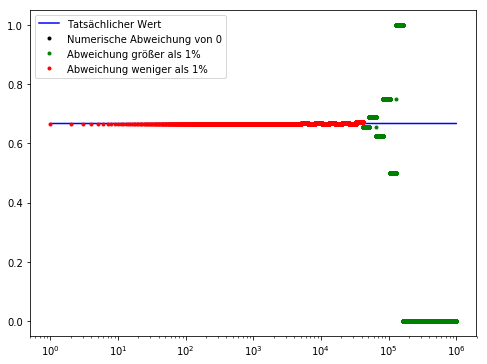

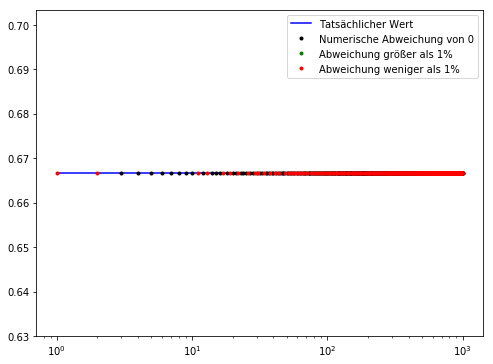

In [8]:
makeplot(f, 1, 6)
makeplot(g, 2, 3)

## Aufgabe 2a)

Es ist ein Term des differektiellen Wirkungsquerschnitts für die Reaktion $\text{e}^{-}\text{e}^{+} \to \gamma\gamma$ gegeben und es soll bestimmt werden, ob dieser numerisch stabil ist. Außerdem soll der Bereich von $\theta$ bestimmt werden, in dem die Gleichung für $\text{E}_\text{e} = 50\, \text{GeV}$ numerisch instabil ist. 

## b) 
Das Stabilitätsproblem soll durch eine geeignete analytische Umformung gelöst werden. 

Der Ausdruck ist numerisch nicht stabil, da es, wenn $\theta$ Werte nahe $\pi$ annimmt, im Nenner zu einer Subtraktion 
zweier fast gleich großer Zahlen kommt, was immer mit großen Rundungsfehlern behaftet ist.

Mithilfe der angegebenen Umformungen kann man den Tern umschreiben zu:
$
\frac{d\sigma}{d\Omega}=\frac{\alpha^2}{s}\left(\frac{2+\sin^2(\theta)}{\sin^2(\theta)+\frac{1}{\gamma}\cos^2(\theta)}\right)$

## c) 

Es soll gezeigt werden, dass die Stabilitätsprobleme behoben wurden, indem die Gleichungen in den kritischen Intervallen graphisch dargestellt werden.  

In [9]:
import scipy.constants as const

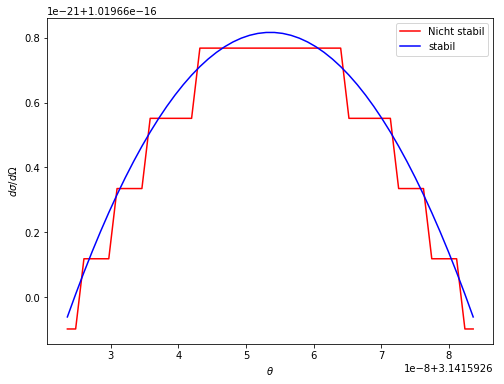

In [10]:
Ee = 50*1e9 
me = 511*1e3 
s = (2*Ee)**2
gamma = Ee/me
beta = np.sqrt(1-gamma**(-2))
alpha= const.alpha 

def wirkung(theta):
    return alpha**2 /s * ((2 + np.sin(theta)**2)/(1-beta**2 *np.cos(theta)**2))

def verbessert(theta):
    return alpha**2 /s * ((2 + np.sin(theta)**2)/(np.sin(theta)**2+1/(gamma**2)*np.cos(theta)**2))

x=np.linspace(np.pi-0.00000003, np.pi+0.00000003)

plt.figure(3, figsize=(8,6))
plt.plot(x, wirkung(x), 'r-', label="Nicht stabil")
plt.plot(x, verbessert(x), 'b-', label="stabil")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$d\sigma/d\Omega$')
plt.legend()


## d) 

Die Konditionszahl soll berechnet werden und es soll erklärt werden, wie diese von $\theta$ abhängt. 

In [11]:
def K(theta): 
    return np.abs((2*np.sin(theta)* np.cos(theta)*(3*me**2 -2*Ee**2)) / ((np.sin(theta)**2 +2)*(me**2 *np.cos(theta)**2+ Ee**2 * np.sin(theta)**2))*theta)

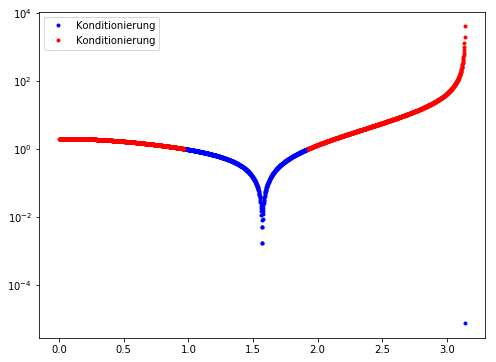

In [13]:
theta= np.linspace(-0, np.pi, 2000)
y= K(theta)
plt.figure(1, figsize=(8,6))
plt.plot(theta[y<1], y[y<1], "b.", label="Konditionierung")
plt.plot(theta[y>1], y[y>1], "r.", label="Konditionierung")
plt.legend(loc="best")
plt.yscale("log")

## e) 

Der Verlauf der Konditionszahl soll als Funktion von $\theta$ im Intervall $(0 \leq \theta \leq \pi )$ graphisch dargestellt werden. Außerdem soll erklärt werden, in welchem Bereich das Problem gut und in welchem schlecht konditioniert ist. 